## Chapter 2
# Linear functions
### 2.1 Linear functions

**Functions in Julia.** Julia provides several methods for defining functions. A simple function given by an expression such as $f(x) = x_1 + x_2 − x^{2}_4$ can be defined in a single line.

In [1]:
f(x) = x[1] + x[2] - x[4]^2

f (generic function with 1 method)

In [2]:
f([-1,0,1,2])

-5

Since the function definition refers to the first, second, and fourth elements of the argument `x`, these have to be defined when you call or evaluate `f(x)`; you’ll get an error if, for example, `x` has dimension `3` or is a scalar.

**Superposition.** Suppose `a` is an `n`-vector. The function $f(x) = a^Tx$ is linear, which means that for any `n`-vectors `x` and `y`, and any scalars $α$ and $β$, the superposition equality holds.

$$f(αx+ βy) = αf(x) + βf(y)$$

Superposition says that evaluating $f$ at a linear combination of two vectors is the same forming the linear combination of $f$ evaluated at the two vectors. Let’s define the inner product function $f$ for a specific value of `a`, and then verify superposition in Julia for specific values of $x, y, α$, and $β$. (This check does not show that the function is linear. It simply checks that superposition holds for these specific values.)

In [3]:
a = [-2, 0, 1, -3];
f(x) = a'*x # Inner product function

f (generic function with 1 method)

In [4]:
x = [2, 2, -1, 1]; y= [0, 1, -1, 0];
alpha = 1.5; beta = -3.7;

In [5]:
lhs = f(alpha * x + beta * y)'
rhs = alpha * f(x) + beta * f(y)'

lhs, rhs, lhs==rhs

(-8.3, -8.3, true)

For the function $f(x) = a^Tx$, we have $f(e_3) = a_3$. Let’s check that this holds in our example.

In [6]:
e3 = [0, 0, 1, 0]
f(e3)'

1

**Examples.** Let’s define the average function in Julia, and check its value for a specific vector. (Julia’s `Statistics` package contains the average function, which is called mean.)

In [7]:
avg(x) = (ones(length(x)) / length(x))'*x;
x = [1, -3, 2, -1];
avg(x)

-0.25

The average function can be implemented more concisely as `sum(x)/length(x)`. The `avg` function is part of the `VMLS` package; once you install and then add this package, you can use the `avg` function.

### 2.2 Taylor approximation

**Taylor approximation.** The (first-order) Taylor approximation of a function $f$ : $R^n → R$, at the point $z$, is the affine function of $x$ given by

$$f̂(x) = f(z) +∇f(z)^T (x − z).$$

For $x$ near $z$, $f̂(x)$ is very close to $f(x)$. Let’s try a numerical example (see page [36](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#section*.54)) using Julia.

In [8]:
f(x) = x[1] + exp(x[2]-x[1]); # A function
# And its gradient
grad_f(z) = [1-exp(z[2]-z[1]), exp(z[2]-z[1])];
z = [1, 2];
# Taylor approximation at z
f_hat(x) = f(z) + grad_f(z)'*(x-z);
# Let’s compare f and f_hat for some specific x’s
f([1,2]), f_hat([1,2])

(3.718281828459045, 3.718281828459045)

In [9]:
f([0.96,1.98]), f_hat([0.96,1.98])

(3.7331947639642977, 3.732647465028226)

In [10]:
f([1.10,2.11]), f_hat([1.10,2.11])

(3.845601015016916, 3.845464646743635)

### 2.3 Regression model

**Regression model.** The regression model is the affine function of $x$ given by, $f(x) = x^Tβ + v$, where the $n$-vector $β$ and the scalar $v$ are the parameters in the model. The regression model is used to guess or approximate a real or observed value of the number $y$ that is associated with $x$. (We’ll see later how to find the parameters in a regression model, using data.)

Let’s define the regression model for house sale prices described on page [39](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.56) of  VMLS, and compare its prediction to the true house sale price $y$ for a few values of $x$.

In [11]:
# Parameters in regression model
beta = [148.73, -18.85]; v = 54.40;
y_hat(x) = x'*beta + v;
# Evaluate regression model prediction
x = [0.846, 1]; y = 115;
y_hat(x), y
x = [1.324,2]; y = 234.50;
y_hat(x), y

(213.61852000000002, 234.5)

Our first prediction is pretty bad; our second one is better.

A scatter plot of predicted and actual house prices (Figure [2.4](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#figure.2.4) of VMLS) can be generated as follows. We use the VMLS function house_sales_data to obtain the vectors price, area, beds (see appendix A)

In [12]:
using VMLS
D = house_sales_data();

In [13]:
price = D["price"]

774-element Vector{Float64}:
  94.905
  98.937
 100.309
 106.25
 107.502
 108.75
 110.7
 113.263
 116.25
 120.0
 121.63
 122.0
 122.682
   ⋮
 224.252
 225.0
 228.0
 229.027
 229.5
 230.0
 230.0
 232.425
 234.0
 235.0
 235.301
 235.738

In [14]:
area = D["area"]

774-element Vector{Float64}:
 0.941
 1.146
 0.909
 1.289
 1.02
 1.022
 1.134
 0.844
 0.795
 0.588
 1.356
 1.118
 1.329
 ⋮
 0.96
 1.456
 1.45
 1.358
 1.329
 1.715
 1.262
 2.28
 1.477
 1.216
 1.685
 1.362

In [15]:
beds = D["beds"]

774-element Vector{Int64}:
 2
 3
 3
 3
 3
 2
 2
 2
 2
 2
 3
 3
 4
 ⋮
 3
 3
 3
 3
 4
 4
 3
 4
 3
 3
 4
 3

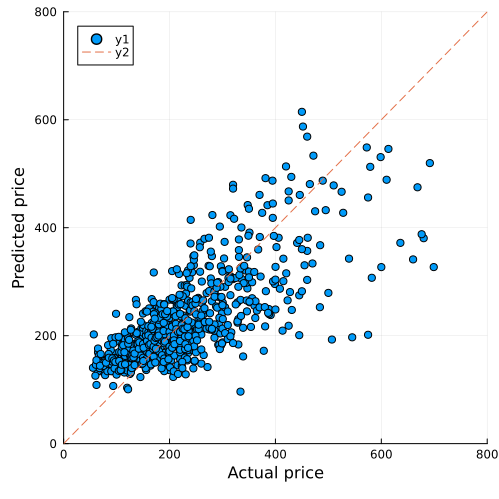

In [16]:
v = 54.4017;
beta = [ 147.7251, -18.8534 ];
predicted = v .+ beta[1] * area + beta[2] * beds;
using Plots
scatter(price, predicted, lims = (0,800))
plot!([0, 800], [0, 800], linestyle = :dash)
# make axes equal and add labels
plot!(xlims = (0,800), ylims = (0,800), size = (500,500))
plot!(xlabel = "Actual price", ylabel = "Predicted price")

**Figure 2.1** Scatter plot of actual and predicted sale prices for 774 houses sold in Sacramento during a five-day period.